# 02a: Exploratory Data Analysis (Aggregated Data)

## Project Overview

This notebook focuses on performing Exploratory Data Analysis (EDA) on the `patient_aggregated_features_df.csv` file created during the data ingestion phase. This file contains one row per patient, with static features and summary statistics (mean, std, min, max) for their time-series measurements.

## Goal for this notebook

The primary goal is to deeply understand the aggregated dataset to inform our feature engineering and modeling strategies for XGBoost. The analysis and visualizations generated here will serve as the foundation for the Data Summary section of the project writeup.

## 1. Setup and Data Loading

We begin by importing the necessary libraries for data analysis and visualization, and then load the processed data file created by the `01_Data_Ingestion` notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot style settings
plt.style.use('seaborn-v0_8-whitegrid')
#plt.style.use('seaborn-whitegrid') # use this if getting error in previous line
pd.set_option('display.max_columns', None)

# Load the processed data from the previous step
try:
    df = pd.read_csv('../data/processed/patient_aggregated_features_df.csv')
    print("Successfully loaded 'patient_aggregated_features_df.csv'.")
    print(f"Dataset shape: {df.shape}")
except FileNotFoundError:
    print("Error: 'patient_aggregated_features_df.csv' not found.")
    print("Please ensure the data ingestion notebook (01_Data_Ingestion.ipynb) has been run successfully.")


Successfully loaded 'patient_aggregated_features_df.csv'.
Dataset shape: (4000, 191)


## 2. Initial Data Inspection

Let's start with a high-level overview of the dataset, examining the data types, column counts, and summary statistics for all numeric features.

In [2]:
# Display a concise summary of the DataFrame, including data types and non-null counts
print("--- DataFrame Info ---")
df.info()

# Generate descriptive statistics for a statistical overview
print("\n--- Descriptive Statistics ---")
df.describe()


--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Columns: 191 entries, RecordID to pH_count
dtypes: float64(149), int64(42)
memory usage: 5.8 MB

--- Descriptive Statistics ---


RecordID          Age       Gender       Height      ICUType  \
count    4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean   137605.122000    64.247500     0.560750    88.919475     2.760000   
std      2923.608886    17.560946     0.497867    86.531203     1.002572   
min    132539.000000    15.000000    -1.000000    -1.000000     1.000000   
25%    135075.750000    52.750000     0.000000    -1.000000     2.000000   
50%    137592.500000    67.000000     1.000000   152.400000     3.000000   
75%    140100.250000    78.000000     1.000000   170.200000     4.000000   
max    142673.000000    90.000000     1.000000   431.800000     4.000000   

       In-hospital_death  Length_of_stay       SAPS-I         SOFA  \
count        4000.000000     4000.000000  4000.000000  4000.000000   
mean            0.138500       13.441750    14.203500     6.402500   
std             0.345467       12.246371     6.088584     4.201298   
min             0.000000       -1.000000    -1.000000    -1.000000   
25%             0.000000        6.000000    11.000000     3.000000   
50%             0.000000       10.000000    15.000000     6.000000   
75%             0.000000       17.000000    18.000000     9.000000   
max             1.000000      154.000000    34.000000    22.000000   

          Survival      Weight     ALP_mean     ALP_std      ALP_min  \
count  4000.000000  4000.00000  1690.000000  755.000000  1690.000000   
mean    128.735500    74.75629   104.653936   15.732881    98.334911   
std     363.714273    31.97107   106.396738   40.817091    95.312681   
min      -1.000000    -1.00000    12.000000    0.000000    12.000000   
25%      -1.000000    62.00000    57.000000    3.505942    55.000000   
50%      -1.000000    76.20000    78.000000    7.500000    75.000000   
75%      16.000000    90.42500   110.000000   15.977040   105.000000   
max    2600.000000   300.00000  1472.333333  890.490520  1339.000000   

           ALP_max    ALP_count     ALT_mean      ALT_std      ALT_min  \
count  1690.000000  4000.000000  1721.000000   777.000000  1721.000000   
mean    111.344379     0.772500   171.738613   101.461250   120.289367   
std     125.731158     1.259818   642.757280   377.891227   424.517270   
min      12.000000     0.000000     3.000000     0.000000     1.000000   
25%      59.000000     0.000000    17.000000     2.121320    16.000000   
50%      80.500000     0.000000    31.000000     7.778175    29.000000   
75%     115.000000     1.000000    70.000000    36.062446    62.000000   
max    2205.000000    12.000000  9143.428571  3942.797416  6558.000000   

            ALT_max    ALT_count      AST_mean      AST_std       AST_min  \
count   1721.000000  4000.000000   1725.000000   777.000000   1725.000000   
mean     222.420105     0.793750    240.477573   207.706214    143.810435   
std      896.701135     1.281648    887.232526   738.277959    535.691960   
min        3.000000     0.000000      6.000000     0.000000      4.000000   
25%       18.000000     0.000000     25.000000     4.949747     24.000000   
50%       33.000000     0.000000     46.333333    16.970563     41.000000   
75%       76.000000     1.000000    104.500000    73.186975     86.000000   
max    11470.000000    12.000000  15680.000000  8023.540646  15680.000000   

            AST_max    AST_count  Albumin_mean  Albumin_std  Albumin_min  \
count   1725.000000  4000.000000   1615.000000   504.000000  1615.000000   
mean     348.200000     0.795000      2.971589     0.220278     2.914737   
std     1408.873938     1.282531      0.636535     0.212066     0.661936   
min        6.000000     0.000000      1.100000     0.000000     1.000000   
25%       26.000000     0.000000      2.500000     0.070711     2.400000   
50%       49.000000     0.000000      3.000000     0.152205     2.900000   
75%      119.000000     1.000000      3.400000     0.282843     3.400000   
max    18430.000000    12.000000      5.300000     1.272792     5.300000   

 

## 3. Target Variable Analysis: Class Imbalance

A crucial first step in any classification problem is to understand the distribution of the target variable. In our case, this is `In-hospital_death`.

**Finding**: The plot clearly shows a significant class imbalance. The survival class (0) makes up the vast majority of the dataset (approx. 86%), while the mortality class (1) is the minority (~14%). This must be addressed during modeling (e.g., using SMOTE or class weights) to prevent the model from being biased towards the majority class.

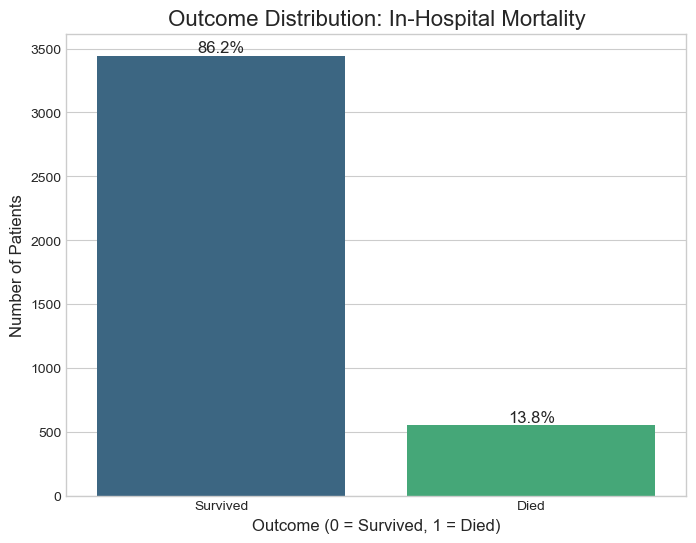

In [3]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='In-hospital_death', data=df, palette='viridis')

plt.title('Outcome Distribution: In-Hospital Mortality', fontsize=16)
plt.xlabel('Outcome (0 = Survived, 1 = Died)', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
ax.set_xticklabels(['Survived', 'Died'])

# Add percentage labels
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12)

plt.show()


## 4. Missing Data Analysis

Real-world clinical data is rarely complete. Here, we'll identify which features have missing values and to what extent.

**Finding**: The analysis reveals that many features have a very high percentage of missing data. Specialized lab tests like `Cholesterol` and `TroponinI` are missing for over 90% of patients, making their aggregated statistics (like `_std`) almost entirely null. Other important features like `RespRate` also show significant missingness (>70%). This is expected in a clinical setting where not all tests are run on all patients. Our preprocessing pipeline before modeling will need a robust imputation strategy, and we will likely need to exclude features that are almost entirely missing to avoid introducing noise.

In [4]:
# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().sum() * 100 / len(df)

# Display only the columns that have missing values, sorted from most to least
print("Percentage of missing values per feature (Top 50):")
print(missing_percentage[missing_percentage > 0].sort_values(ascending=False).head(50))


Percentage of missing values per feature (Top 50):
Cholesterol_std     99.750
TroponinI_std       97.025
TroponinI_mean      94.875
TroponinI_max       94.875
TroponinI_min       94.875
Cholesterol_mean    92.375
Cholesterol_max     92.375
Cholesterol_min     92.375
Albumin_std         87.400
TroponinT_std       84.725
ALP_std             81.125
AST_std             80.575
ALT_std             80.575
Bilirubin_std       80.375
TroponinT_max       78.425
TroponinT_mean      78.425
TroponinT_min       78.425
RespRate_std        72.500
RespRate_min        72.475
RespRate_mean       72.475
RespRate_max        72.475
SaO2_std            66.225
Lactate_std         63.375
Albumin_max         59.625
Albumin_min         59.625
Albumin_mean        59.625
ALP_mean            57.750
ALP_min             57.750
ALP_max             57.750
Bilirubin_max       57.050
Bilirubin_mean      57.050
Bilirubin_min       57.050
ALT_max             56.975
ALT_mean            56.975
ALT_min             56.975
AST_

## 5. Univariate Analysis: Feature Distributions vs. Outcome

How do the distributions of individual features differ for patients who survived versus those who did not? This analysis helps identify potentially strong predictors.

**Finding**:

- `Age`: The mortality group (green) shows a clear shift to the right, with a peak around 75-80 years old, compared to the survivor group (blue) which peaks closer to 65. This indicates older age is a significant risk factor.

- `Glucose_mean`: While the peaks are close, the mortality group's distribution is wider with a "fatter tail" on the right. This suggests that while the most common glucose level is similar, a higher proportion of patients with very high glucose levels did not survive.

- `NISysABP_mean` (Systolic Blood Pressure): There is a noticeable leftward shift in the mortality group's distribution. Its peak is centered around 110-115, lower than the survivor group's peak at a more normal 120-125, indicating that lower average blood pressure is a risk factor.

- `pH_mean`: This plot shows a clear visual separation. The survivor group (blue) has a tall, narrow distribution centered at approximately 7.4. In contrast, the mortality group (green) has a shorter, wider distribution with a peak shifted to the left (around 7.35). This clear difference in both the center and the spread of the distributions suggests pH_mean is a strong potential predictor.

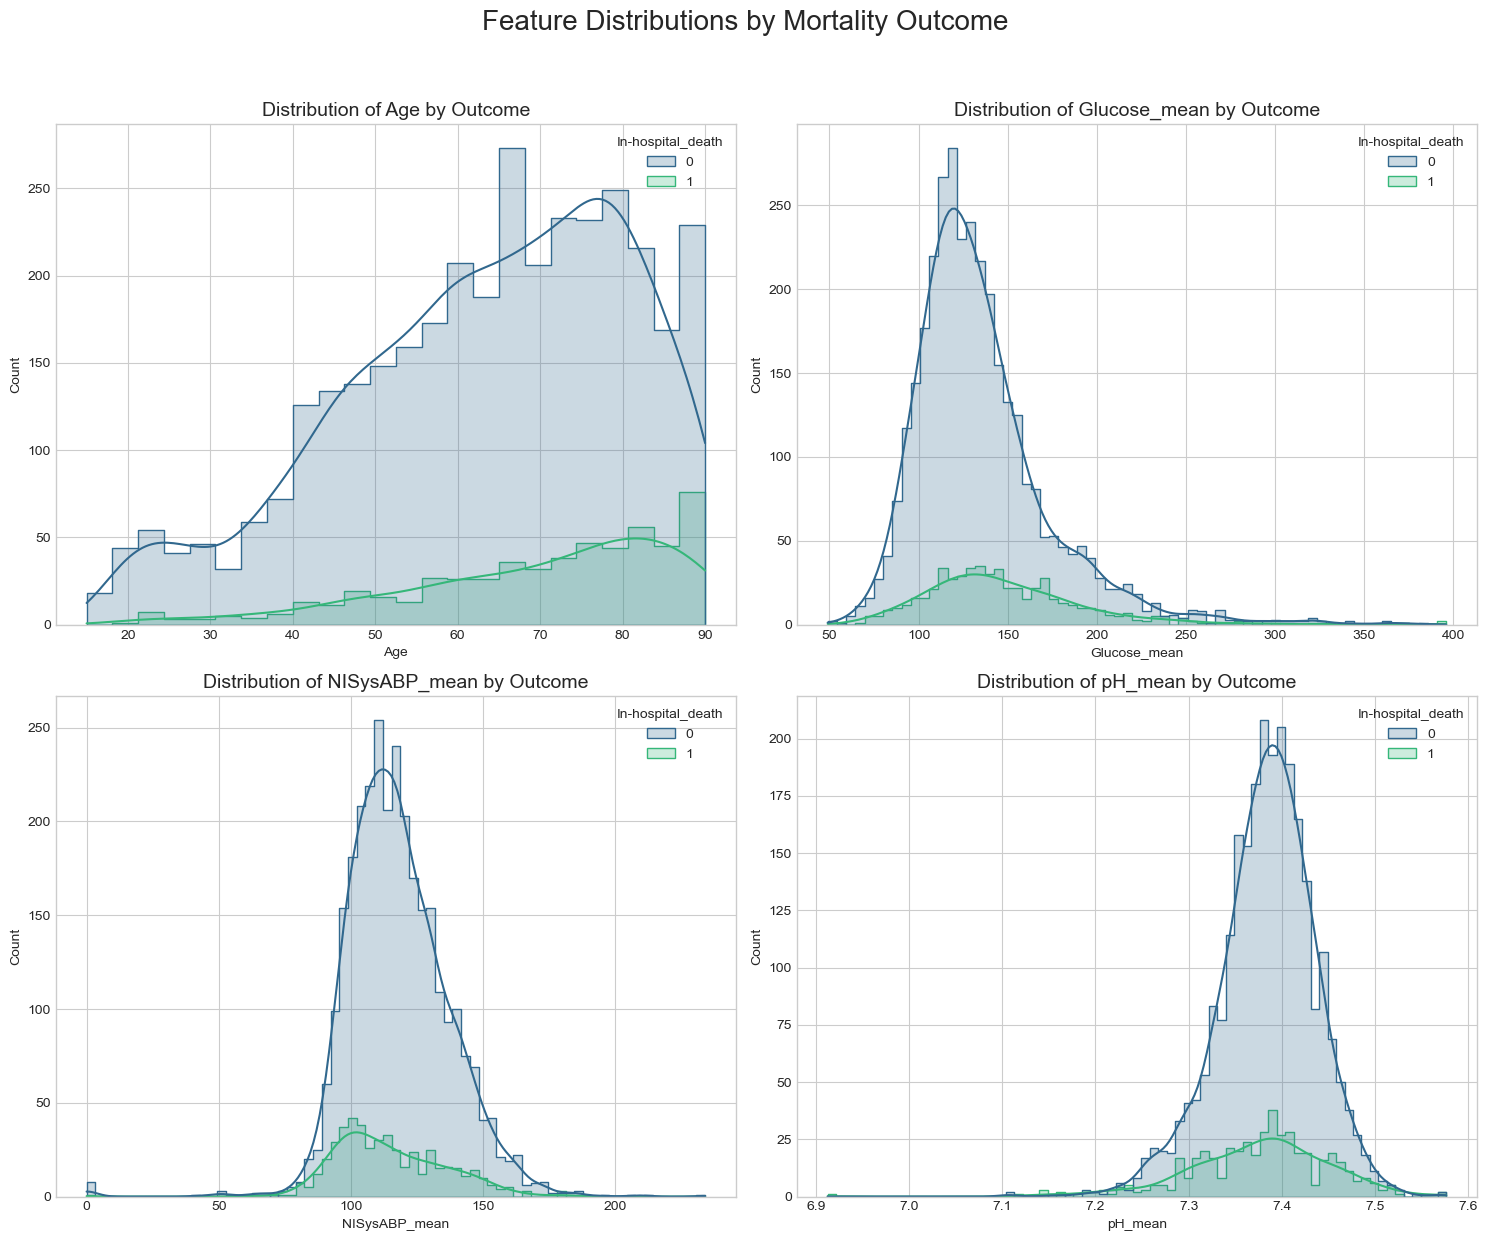

In [5]:
# Plot distributions for a few key features, separated by outcome
features_to_plot = ['Age', 'Glucose_mean', 'NISysABP_mean', 'pH_mean']
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, feature in enumerate(features_to_plot):
    # Create a copy of the data for plotting to avoid changing the original DataFrame
    plot_df = df.copy()
    
    # Special handling for pH_mean to zoom in on the relevant range
    if feature == 'pH_mean':
        # Filter out extreme outliers for visualization purposes
        plot_df = plot_df[plot_df['pH_mean'].between(6.9, 7.6)]
    
    # Special handling for Glucose_mean to zoom in on a reasonable range
    if feature == 'Glucose_mean':
        plot_df = plot_df[plot_df['Glucose_mean'].between(0, 400)]

    sns.histplot(data=plot_df, x=feature, hue='In-hospital_death', kde=True, ax=axes[i], palette='viridis', element="step")
    axes[i].set_title(f'Distribution of {feature} by Outcome', fontsize=14)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

fig.suptitle('Feature Distributions by Mortality Outcome', fontsize=20, y=1.03)
plt.tight_layout()
plt.show()

While histograms are useful, box plots and violin plots can provide a clearer comparison of the central tendency (median), spread (IQR), and shape of the distributions between the "survived" and "died" groups.

**Finding**: These plots reinforce our earlier findings. For both `Age` and `NISysABP_mean`, the median (the line inside the box) is visibly different between the two outcome groups. The violin plots further confirm the different distribution shapes, especially for Age, where the distribution for the mortality group is much wider at the top end.

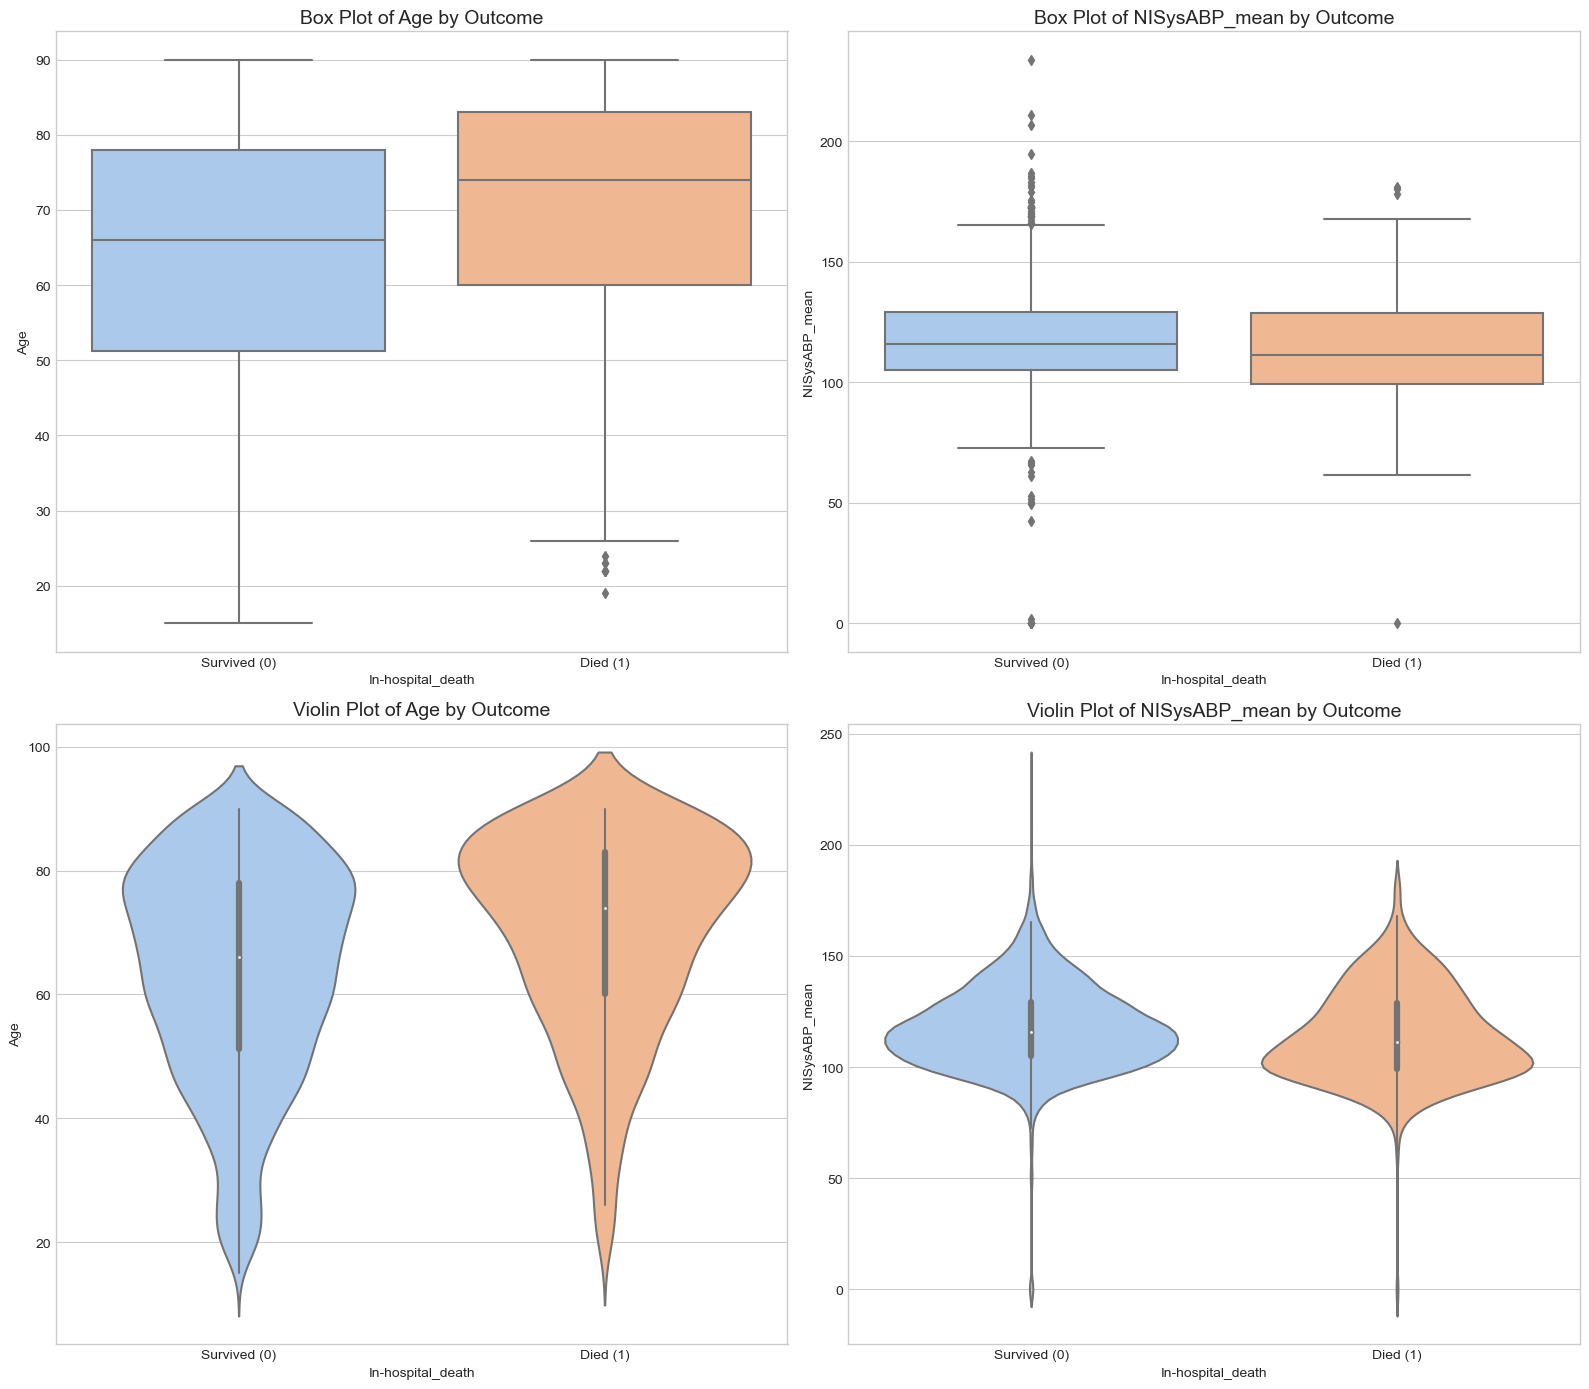

In [6]:
# Select features for box and violin plots
features_to_plot = ['Age', 'NISysABP_mean']

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 14))

# Generate Box Plots
for i, feature in enumerate(features_to_plot):
    sns.boxplot(data=df, x='In-hospital_death', y=feature, ax=axes[0, i], palette='pastel')
    axes[0, i].set_title(f'Box Plot of {feature} by Outcome', fontsize=14)
    axes[0, i].set_xticklabels(['Survived (0)', 'Died (1)'])

# Generate Violin Plots
for i, feature in enumerate(features_to_plot):
    sns.violinplot(data=df, x='In-hospital_death', y=feature, ax=axes[1, i], palette='pastel')
    axes[1, i].set_title(f'Violin Plot of {feature} by Outcome', fontsize=14)
    axes[1, i].set_xticklabels(['Survived (0)', 'Died (1)'])

plt.tight_layout()
plt.show()


## 6. Analysis of Feature Variability (_std columns)

Beyond looking at average values, analyzing the standard deviation of vitals can reveal insights into patient stability. Higher variability might indicate a more unstable patient.

**Finding**: The box plots for `HR_std` (Heart Rate Standard Deviation) and `NISysABP_std` (Systolic Blood Pressure Standard Deviation) show a clear pattern. The median variability for the mortality group (1) is consistently higher than for the survivor group (0). This suggests that patients who did not survive experienced greater fluctuations in their vital signs, which is a potentially powerful predictive signal.

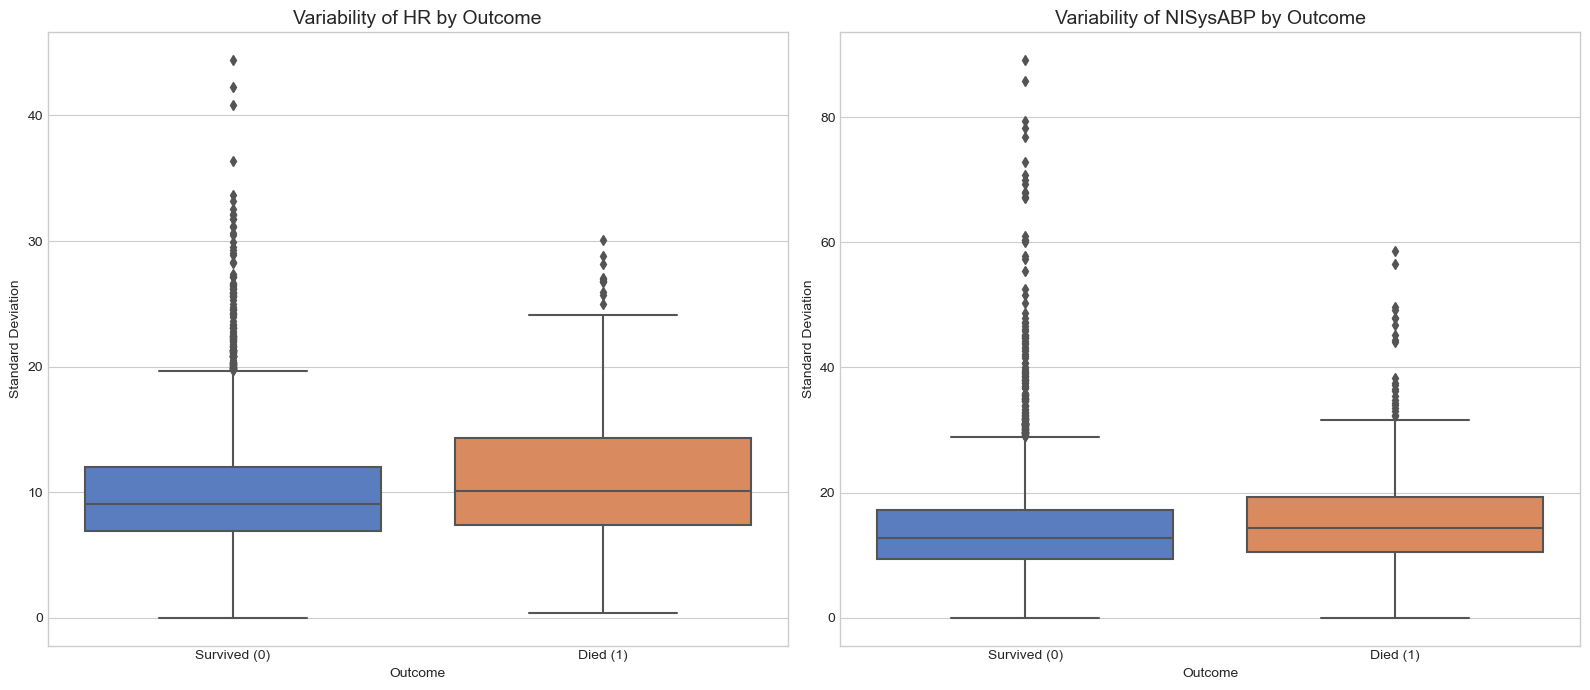

In [7]:
# Select standard deviation features to analyze
std_features_to_plot = ['HR_std', 'NISysABP_std']

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Generate Box Plots for standard deviation features
for i, feature in enumerate(std_features_to_plot):
    sns.boxplot(data=df, x='In-hospital_death', y=feature, ax=axes[i], palette='muted')
    axes[i].set_title(f'Variability of {feature.split("_")[0]} by Outcome', fontsize=14)
    axes[i].set_xticklabels(['Survived (0)', 'Died (1)'])
    axes[i].set_xlabel('Outcome')
    axes[i].set_ylabel('Standard Deviation')

plt.tight_layout()
plt.show()

## 8. Bivariate Analysis: Feature Interactions

Now we'll examine the relationship between pairs of features, coloring the points by their outcome. This can help us identify combinations of factors that are particularly indicative of mortality.

**Finding**: The scatter plots reveal important interactions between features.

- `Age` vs. `SOFA`: The plot shows that the mortality group (orange) is more concentrated in the upper-right quadrant. This suggests that the combination of high age and a high SOFA score is a stronger indicator of mortality than either feature alone.

- `NISysABP_mean` vs. `HR_std`: While the central cluster is a dense mix of both outcomes, the upper-left quadrant (low blood pressure and high heart rate variability) shows a visibly higher proportion of orange dots (died) compared to the lower-left quadrant (low blood pressure and low variability). This suggests that for patients with low blood pressure, having high heart rate variability increases the risk of mortality.

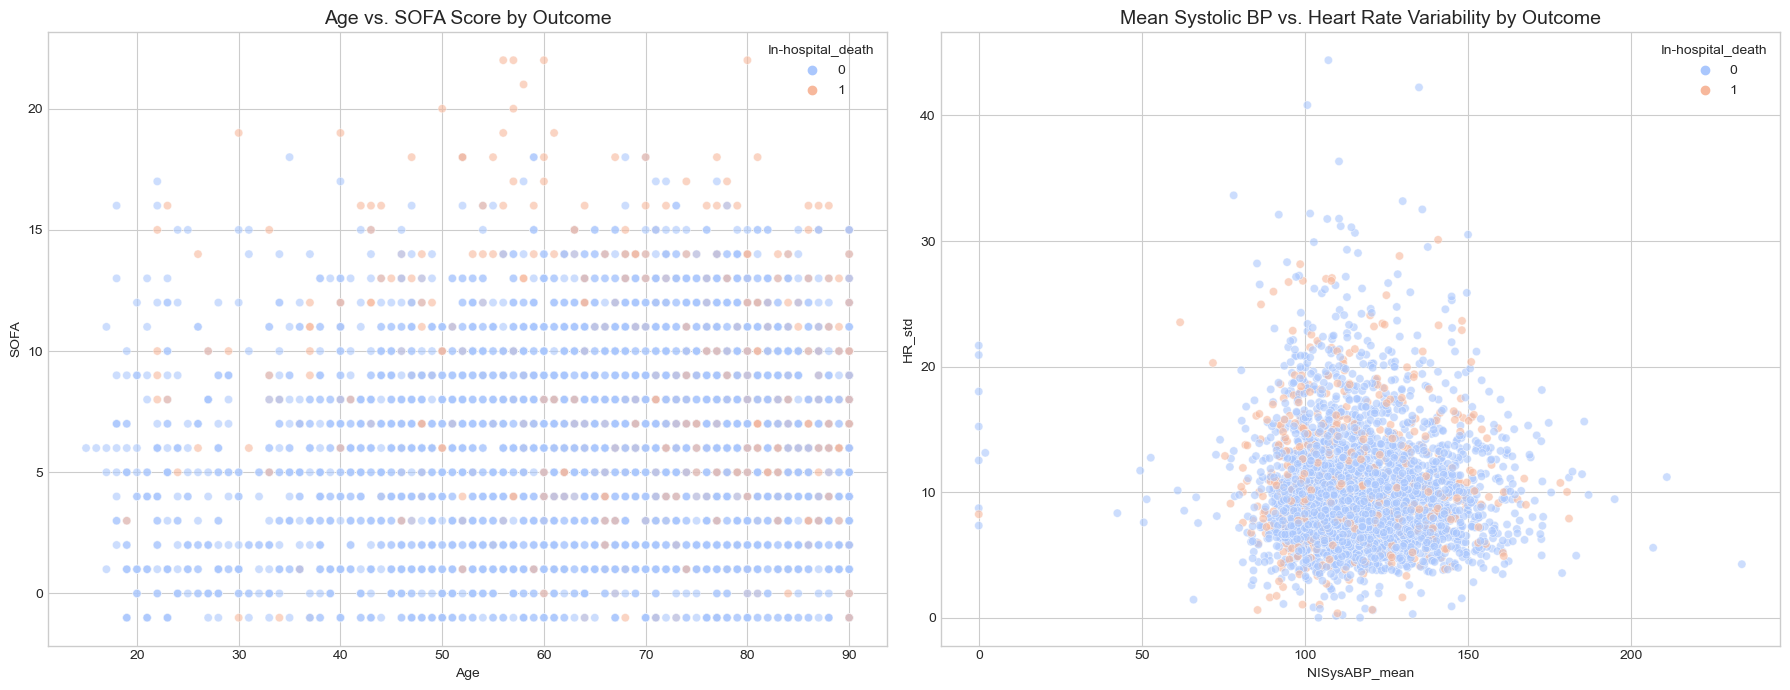

In [8]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Scatter plot for Age vs. SOFA score
sns.scatterplot(data=df, x='Age', y='SOFA', hue='In-hospital_death', ax=axes[0], palette='coolwarm', alpha=0.6)
axes[0].set_title('Age vs. SOFA Score by Outcome', fontsize=14)

# Scatter plot for Mean Systolic BP vs. Heart Rate Variability
# We'll filter out extreme outliers in HR_std for better visualization
df_filtered = df[df['HR_std'] < 50] # Filter for HR_std < 50
sns.scatterplot(data=df_filtered, x='NISysABP_mean', y='HR_std', hue='In-hospital_death', ax=axes[1], palette='coolwarm', alpha=0.6)
axes[1].set_title('Mean Systolic BP vs. Heart Rate Variability by Outcome', fontsize=14)

plt.tight_layout()
plt.show()


## 9. Preliminary Feature Importance

To get an early, data-driven sense of which features are most predictive, we can train a simple RandomForest model and examine its feature importances. This is not our final model, but a tool for exploration.

**Finding**: This data-driven approach provides new insights that complement our visual EDA. While our intuition about `Age` was confirmed, the model reveals that features representing critical events (_min and _max values) and patient stability (_std values) are highly important. For example, `GCS_mean` (neurological status), `Urine_min` (a sign of kidney function), and `HR_std` (heart rate variability) all rank higher than `Age`. This highlights the importance of moving beyond simple averages to capture the full picture of a patient's condition. Note: The `Survival` feature is a direct leak of the target and must be excluded from the final model.

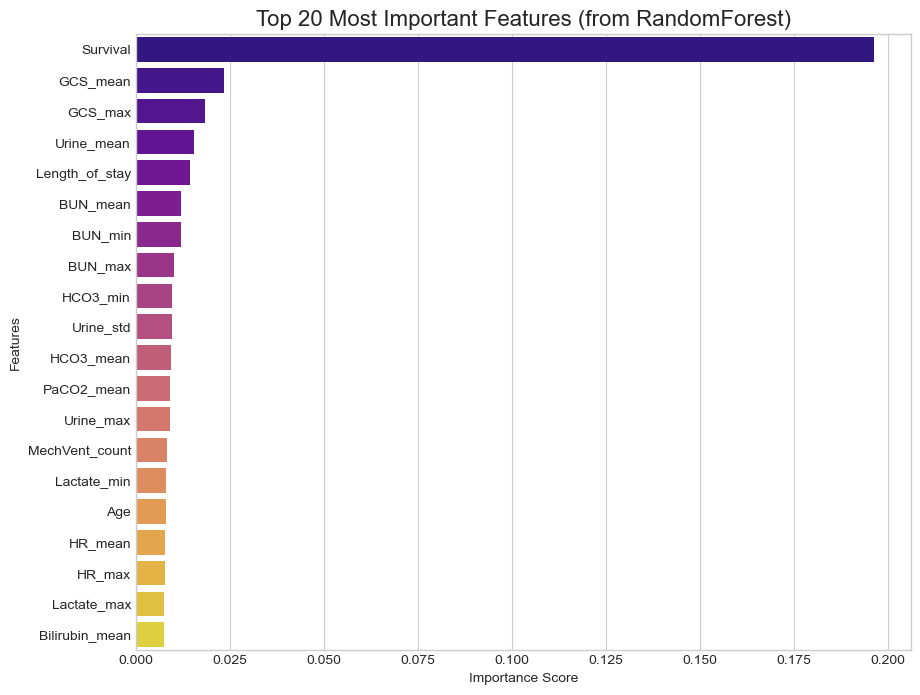

In [9]:
from sklearn.ensemble import RandomForestClassifier

# --- Prepare data for the model ---
# Create a copy and handle missing values with the median for this quick analysis
df_model = df.copy()
for col in df_model.columns:
    if df_model[col].isnull().any():
        median_val = df_model[col].median()
        df_model[col].fillna(median_val, inplace=True)

# Define features (X) and target (y)
X = df_model.drop(columns=['RecordID', 'In-hospital_death'])
y = df_model['In-hospital_death']

# --- Train a simple RandomForest model ---
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X, y)

# --- Get and plot feature importances ---
importances = pd.Series(model.feature_importances_, index=X.columns)
top_20 = importances.sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 8))
sns.barplot(x=top_20.values, y=top_20.index, palette='plasma')
plt.title('Top 20 Most Important Features (from RandomForest)', fontsize=16)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

## 10. Multivariate Analysis: Feature Correlations

This analysis helps us understand the relationships between different numeric features. A heatmap is an effective way to visualize the correlation matrix.

**Finding**: There are strong, expected correlations between related clinical measurements. For example, the different blood pressure means (`NIMAP_mean`, `NISysABP_mean`) are highly correlated. The clinical severity scores `SAPS-I` and `SOFA` are also correlated with each other and with the mortality outcome. This multicollinearity is less of a concern for tree-based models like XGBoost but would be important to address for linear models.

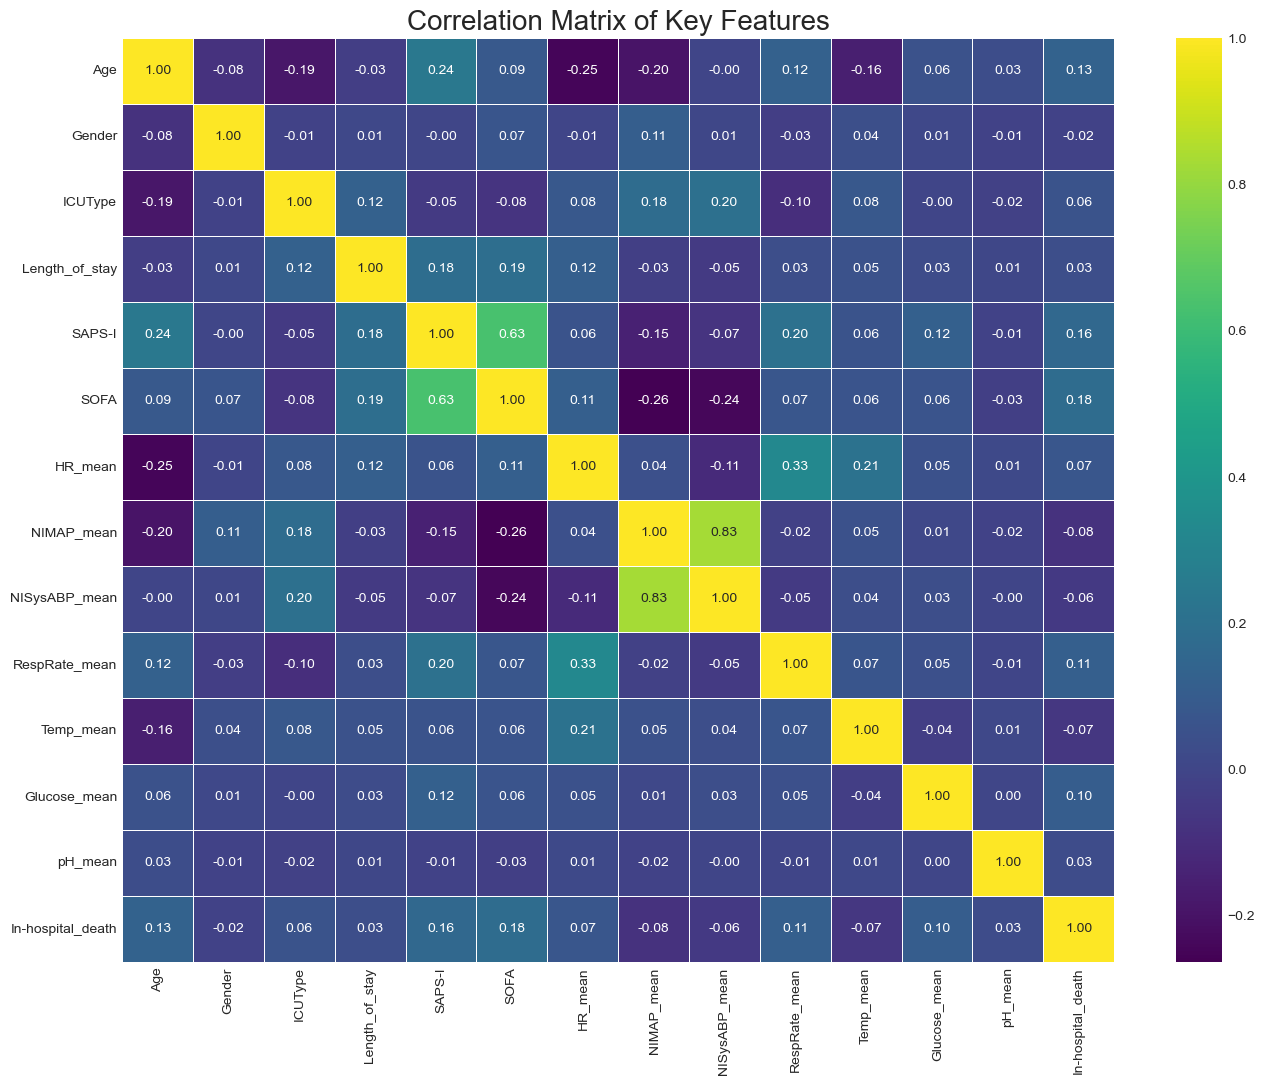

In [10]:
# To keep the heatmap readable, we'll select a subset of key features for visualization
selected_features = [
    'Age', 'Gender', 'ICUType', 'Length_of_stay',
    'SAPS-I', 'SOFA', 'HR_mean', 'NIMAP_mean', 'NISysABP_mean',
    'RespRate_mean', 'Temp_mean', 'Glucose_mean', 'pH_mean', 'In-hospital_death'
]

df_subset = df[selected_features]
corr_matrix = df_subset.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='viridis', linewidths=.5)
plt.title('Correlation Matrix of Key Features', fontsize=20)
plt.show()


## 11. Analysis by Physiological System

To provide structure to our analysis and make our findings more interpretable for a clinical audience, we can group our features by physiological organ system. This approach is based on foundational medical knowledge (similar to how clinical scores like SOFA are constructed) and provides a more authentic, domain-aware perspective on the data.

**Finding**: The violin plots clearly show how dysfunction across multiple organ systems is associated with mortality.

- Scores & Demographics: The `SOFA` score and `Age` distributions are both visibly shifted higher for the mortality group, confirming their predictive power.

- Nervous System: The `GCS_mean` (Glasgow Coma Scale) is lower for patients who died, indicating reduced consciousness is a key risk factor.

- Cardiovascular & Respiratory: The variability (`HR_std`) and rate (`RespRate_mean`) are both higher in the mortality group, suggesting instability and respiratory distress are important signals.

- Renal & Metabolic: The `Urine_min` distribution is tightly clustered near zero for the mortality group, highlighting acute kidney issues. Similarly, the `pH_mean` is shifted lower (more acidic) for this group.

Below, we visualize the distribution of one key feature from each of the major systems to see how they differ by outcome.

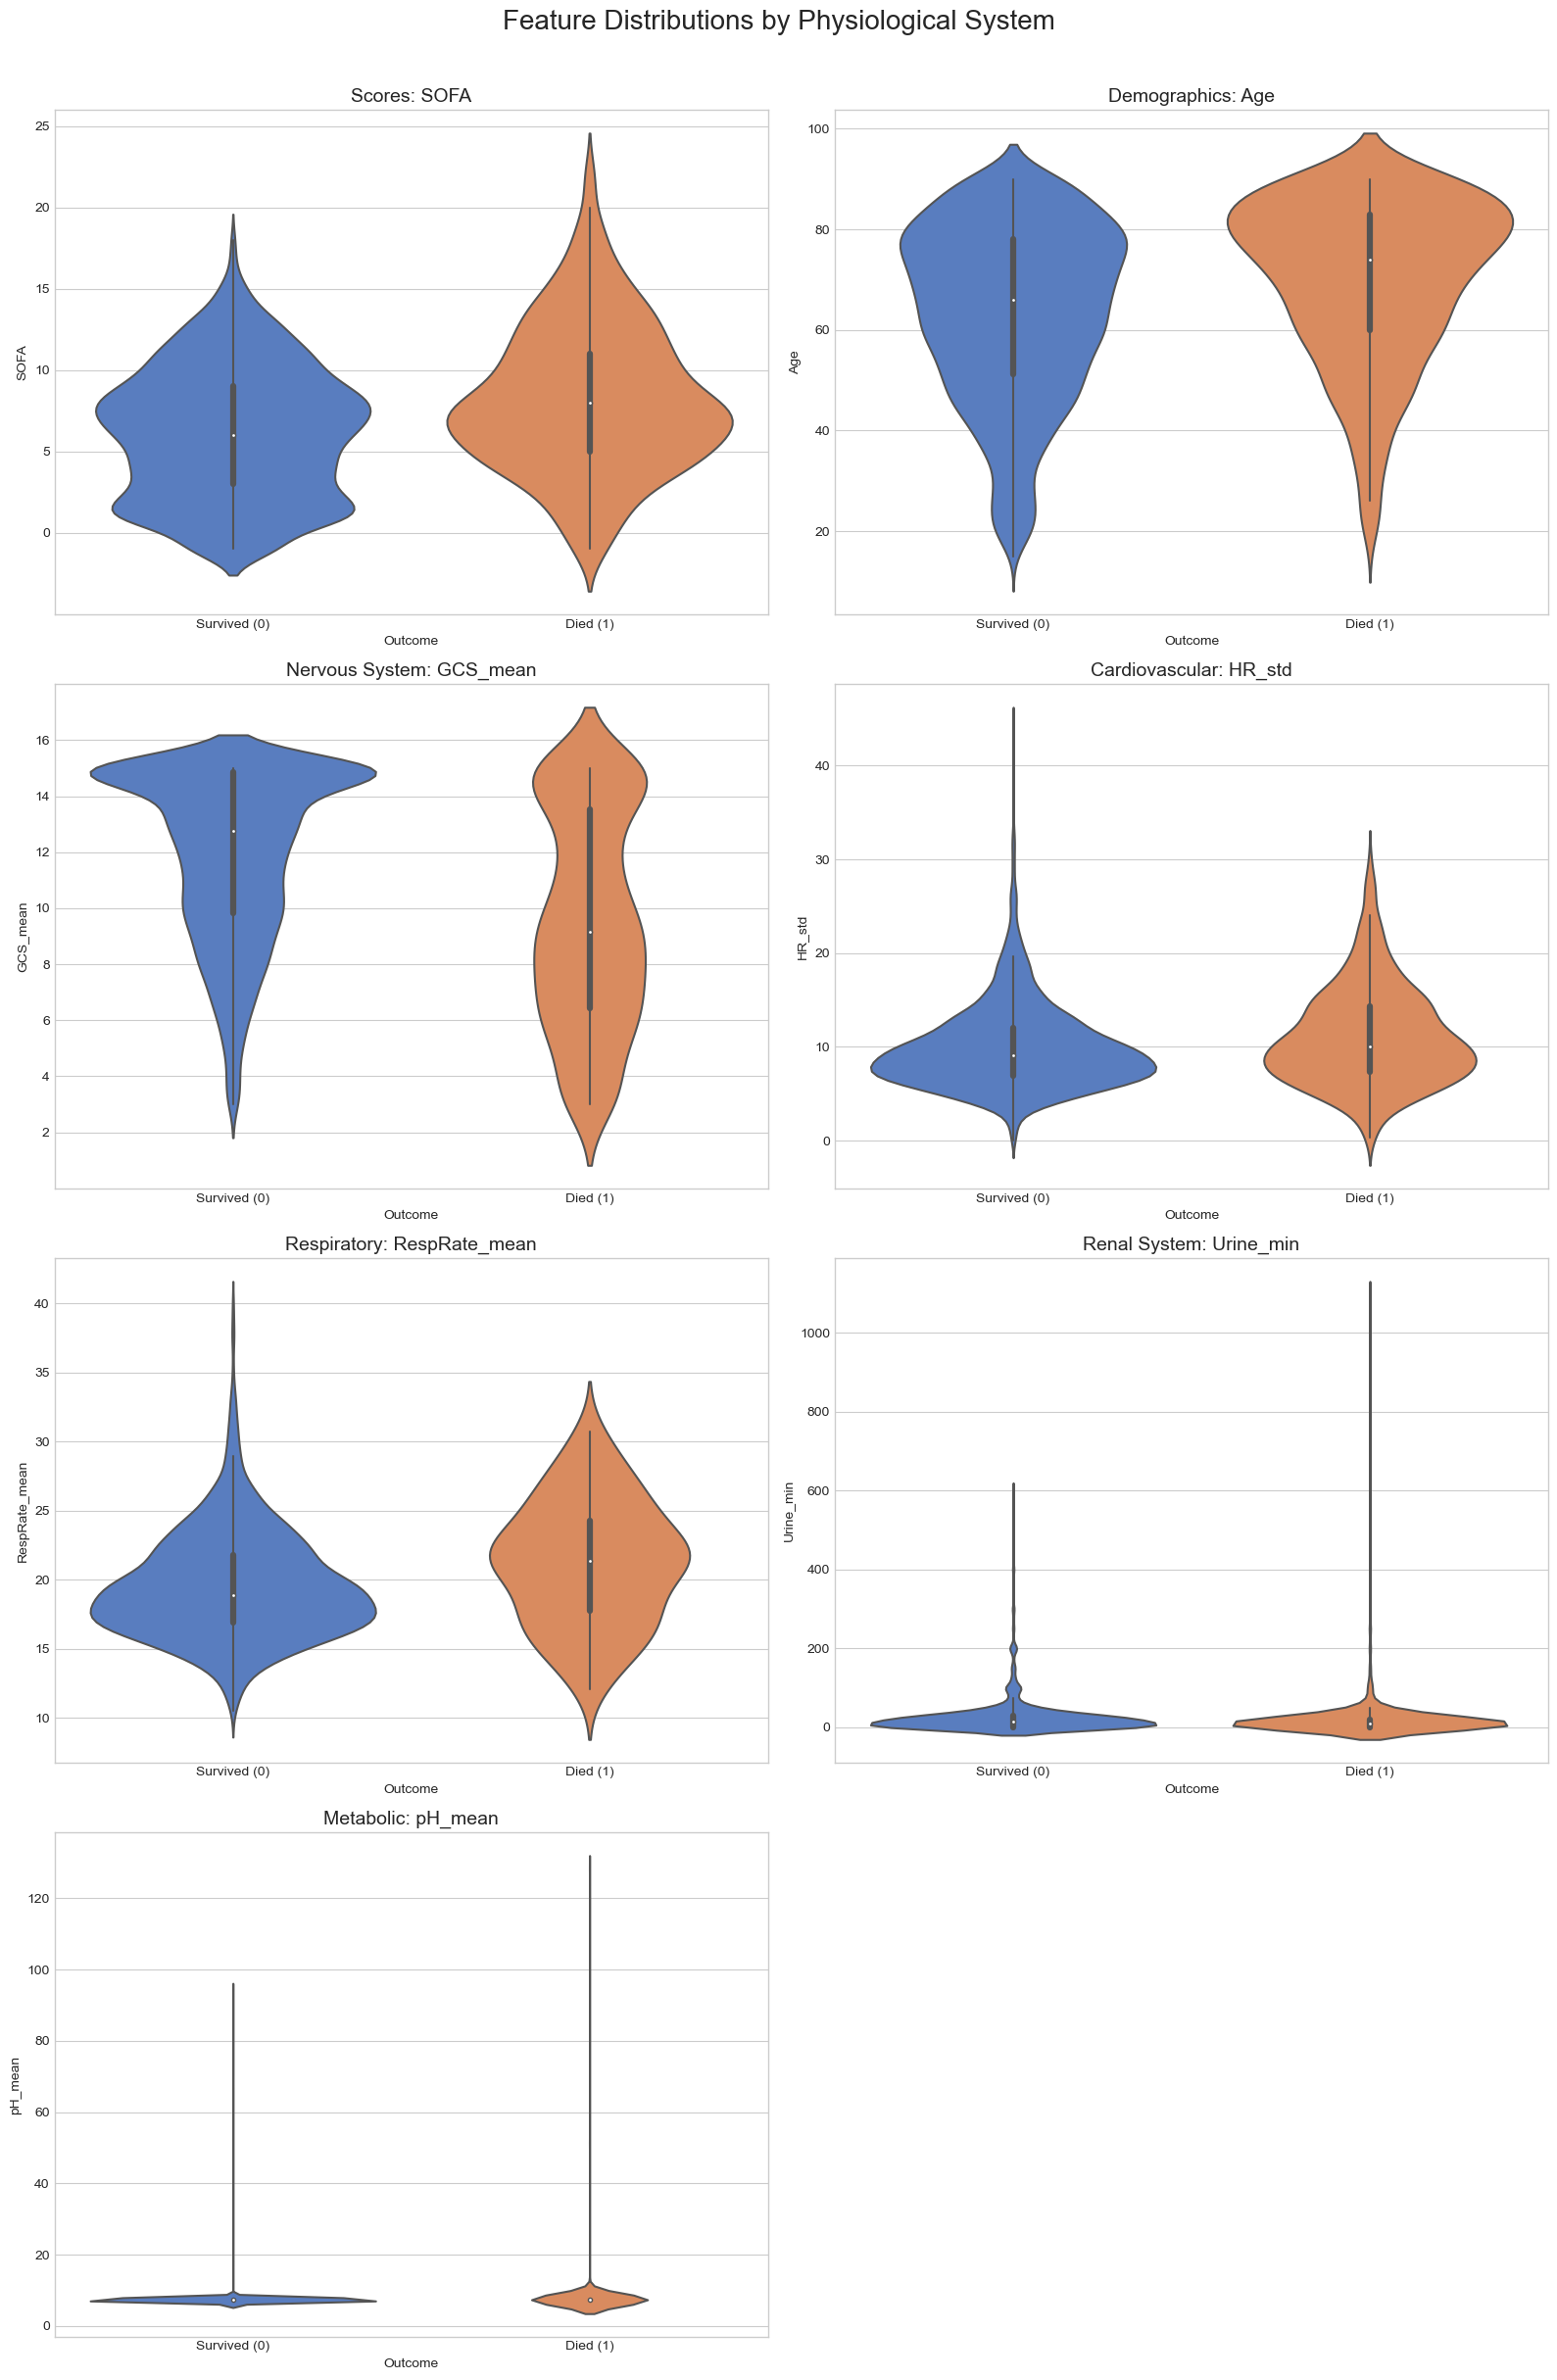

In [11]:
# Define feature categories based on physiological systems
feature_categories = {
    'Scores': 'SOFA',
    'Demographics': 'Age',
    'Nervous System': 'GCS_mean',
    'Cardiovascular': 'HR_std',
    'Respiratory': 'RespRate_mean',
    'Renal System': 'Urine_min',
    'Metabolic': 'pH_mean'
}

# Create subplots
fig, axes = plt.subplots(4, 2, figsize=(16, 24))
axes = axes.flatten()

# Plot violin plot for each category
for i, (category, feature) in enumerate(feature_categories.items()):
    # Handle potential missing features gracefully
    if feature in df.columns:
        sns.violinplot(data=df, x='In-hospital_death', y=feature, ax=axes[i], palette='muted')
        axes[i].set_title(f'{category}: {feature}', fontsize=14)
        axes[i].set_xticklabels(['Survived (0)', 'Died (1)'])
        axes[i].set_xlabel('Outcome')
    else:
        axes[i].set_title(f'{category}: {feature} not available', fontsize=14)
        axes[i].axis('off')

# Hide the last unused subplot if there is an odd number of plots
if len(feature_categories) % 2 != 0:
    axes[-1].axis('off')

fig.suptitle('Feature Distributions by Physiological System', fontsize=20, y=1.01)
plt.tight_layout()
plt.show()